In [22]:
import numpy as np 
import pandas as pd 

In [23]:
#Loading data from CVS file

In [24]:
data="Leads.csv"
df1=pd.read_csv(data)
df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Exploratory data analysis [EDA]

In [25]:

df1.columns = df1.columns.str.lower().str.replace(' ', '_')

string_columns = list(df1.dtypes[df1.dtypes == 'object'].index)

for col in string_columns:
    df1[col] = df1[col].str.lower().str.replace(' ', '_')
df1.head()

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,...,get_updates_on_dm_content,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,i_agree_to_pay_the_amount_through_cheque,a_free_copy_of_mastering_the_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark_chat,no,no,0,0.0,0,0.0,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic_search,no,no,0,5.0,674,2.5,...,no,select,select,02.medium,02.medium,15.0,15.0,no,no,email_opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing_page_submission,direct_traffic,no,no,1,2.0,1532,2.0,...,no,potential_lead,mumbai,02.medium,01.high,14.0,20.0,no,yes,email_opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing_page_submission,direct_traffic,no,no,0,1.0,305,1.0,...,no,select,mumbai,02.medium,01.high,13.0,17.0,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing_page_submission,google,no,no,1,2.0,1428,1.0,...,no,select,mumbai,02.medium,01.high,15.0,18.0,no,no,modified


In [26]:
df1.dtypes

prospect_id                                       object
lead_number                                        int64
lead_origin                                       object
lead_source                                       object
do_not_email                                      object
do_not_call                                       object
converted                                          int64
totalvisits                                      float64
total_time_spent_on_website                        int64
page_views_per_visit                             float64
last_activity                                     object
country                                           object
specialization                                    object
how_did_you_hear_about_x_education                object
what_is_your_current_occupation                   object
what_matters_most_to_you_in_choosing_a_course     object
search                                            object
magazine                       

In [27]:
df1.nunique()

prospect_id                                      9240
lead_number                                      9240
lead_origin                                         5
lead_source                                        20
do_not_email                                        2
do_not_call                                         2
converted                                           2
totalvisits                                        41
total_time_spent_on_website                      1731
page_views_per_visit                              114
last_activity                                      17
country                                            38
specialization                                     19
how_did_you_hear_about_x_education                 10
what_is_your_current_occupation                     6
what_matters_most_to_you_in_choosing_a_course       3
search                                              2
magazine                                            1
newspaper_article           

In [28]:
for cl in df1.columns:
    print(cl, df1[cl].nunique())
    print (df1[cl].unique())
    if df1[cl].nunique()==1:
        del(df1[cl])

    print()
    print()

prospect_id 9240
['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']


lead_number 9240
[660737 660728 660727 ... 579545 579538 579533]


lead_origin 5
['api' 'landing_page_submission' 'lead_add_form' 'lead_import'
 'quick_add_form']


lead_source 20
['olark_chat' 'organic_search' 'direct_traffic' 'google' 'referral_sites'
 'welingak_website' 'reference' 'facebook' nan 'blog' 'pay_per_click_ads'
 'bing' 'social_media' 'welearn' 'click2call' 'live_chat'
 'welearnblog_home' 'youtubechannel' 'testone' 'press_release' 'nc_edm']


do_not_email 2
['no' 'yes']


do_not_call 2
['no' 'yes']


converted 2
[0 1]


totalvisits 41
[  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74

In [29]:
# removing these two columns 

In [30]:
#del (df1['prospect_id'])
#del (df1['lead_number'])

In [31]:
df1.head()

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,...,tags,lead_quality,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,a_free_copy_of_mastering_the_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark_chat,no,no,0,0.0,0,0.0,...,interested_in_other_courses,low_in_relevance,select,select,02.medium,02.medium,15.0,15.0,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic_search,no,no,0,5.0,674,2.5,...,ringing,NaN,select,select,02.medium,02.medium,15.0,15.0,no,email_opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing_page_submission,direct_traffic,no,no,1,2.0,1532,2.0,...,will_revert_after_reading_the_email,might_be,potential_lead,mumbai,02.medium,01.high,14.0,20.0,yes,email_opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing_page_submission,direct_traffic,no,no,0,1.0,305,1.0,...,ringing,not_sure,select,mumbai,02.medium,01.high,13.0,17.0,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing_page_submission,google,no,no,1,2.0,1428,1.0,...,will_revert_after_reading_the_email,might_be,select,mumbai,02.medium,01.high,15.0,18.0,no,modified


In [32]:
print(df1.isnull().sum())
print(len(df1))

prospect_id                                         0
lead_number                                         0
lead_origin                                         0
lead_source                                        36
do_not_email                                        0
do_not_call                                         0
converted                                           0
totalvisits                                       137
total_time_spent_on_website                         0
page_views_per_visit                              137
last_activity                                     103
country                                          2461
specialization                                   1438
how_did_you_hear_about_x_education               2207
what_is_your_current_occupation                  2690
what_matters_most_to_you_in_choosing_a_course    2709
search                                              0
newspaper_article                                   0
x_education_forums          

In [33]:
for cl in df1.columns:
    print (cl)
    print(df1[cl].unique())
    print()
    print()
    

prospect_id
['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']


lead_number
[660737 660728 660727 ... 579545 579538 579533]


lead_origin
['api' 'landing_page_submission' 'lead_add_form' 'lead_import'
 'quick_add_form']


lead_source
['olark_chat' 'organic_search' 'direct_traffic' 'google' 'referral_sites'
 'welingak_website' 'reference' 'facebook' nan 'blog' 'pay_per_click_ads'
 'bing' 'social_media' 'welearn' 'click2call' 'live_chat'
 'welearnblog_home' 'youtubechannel' 'testone' 'press_release' 'nc_edm']


do_not_email
['no' 'yes']


do_not_call
['no' 'yes']


converted
[0 1]


totalvisits
[  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251.  3

replacing all missing values with 0

In [34]:
df_old=df1
for cl in df1.columns:
    if df1[cl].dtype==object:
        df1[cl]=df1[cl].fillna("other")
    else :
        df1[cl]=df1[cl].fillna(0) 
print(df1.isnull().sum())

prospect_id                                      0
lead_number                                      0
lead_origin                                      0
lead_source                                      0
do_not_email                                     0
do_not_call                                      0
converted                                        0
totalvisits                                      0
total_time_spent_on_website                      0
page_views_per_visit                             0
last_activity                                    0
country                                          0
specialization                                   0
how_did_you_hear_about_x_education               0
what_is_your_current_occupation                  0
what_matters_most_to_you_in_choosing_a_course    0
search                                           0
newspaper_article                                0
x_education_forums                               0
newspaper                      

look at the distribution of non object series 

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

lead_number
converted
totalvisits
total_time_spent_on_website
page_views_per_visit
asymmetrique_activity_score
asymmetrique_profile_score


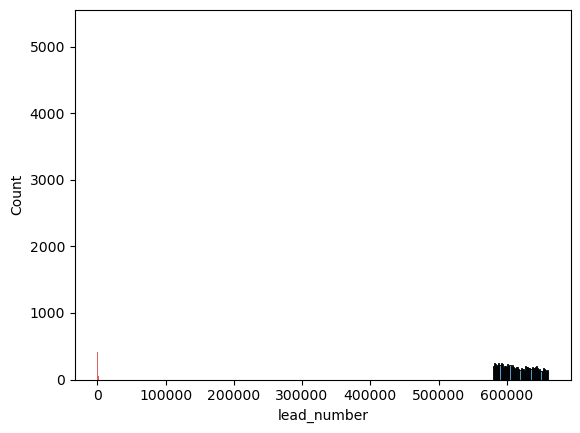

In [36]:
numerical=[]
categorical=[]
for cl in df1.columns:
    if df1[cl].dtype!=object:
        print (cl)
        if cl!='converted':
            numerical.append(cl)
        sns.histplot(df1[cl][df1[cl]>0], bins=50)
    else :
        categorical.append(cl)
        



<AxesSubplot:xlabel='totalvisits', ylabel='Count'>

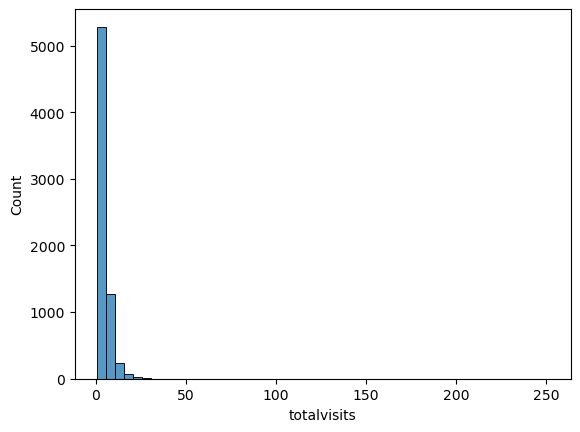

In [37]:
sns.histplot(df1['totalvisits'][df1.totalvisits>0], bins=50)
#print(categorical)

<AxesSubplot:xlabel='total_time_spent_on_website', ylabel='Count'>

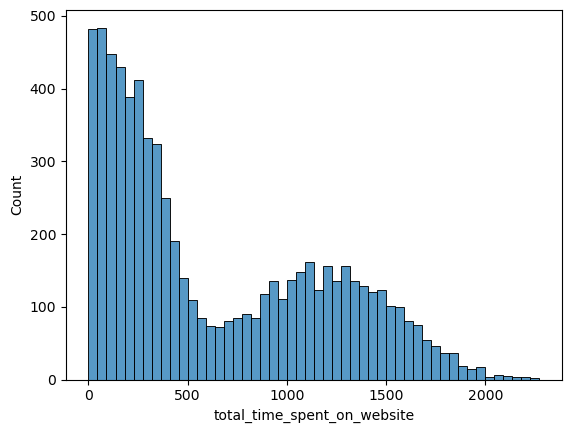

In [38]:
sns.histplot(df1['total_time_spent_on_website'][df.total_time_spent_on_website>0], bins=50)


<AxesSubplot:xlabel='page_views_per_visit', ylabel='Count'>

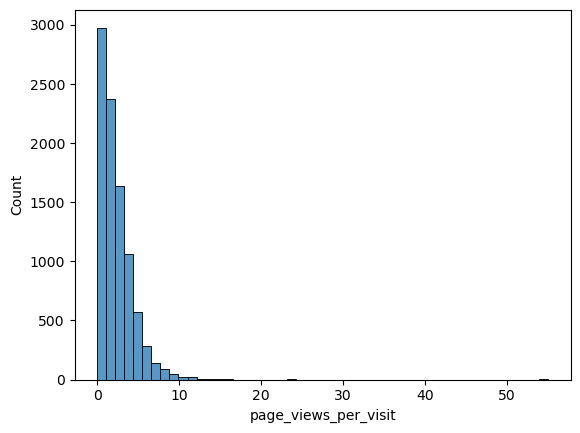

In [39]:
sns.histplot(df1['page_views_per_visit'], bins=50)

<AxesSubplot:xlabel='asymmetrique_activity_score', ylabel='Count'>

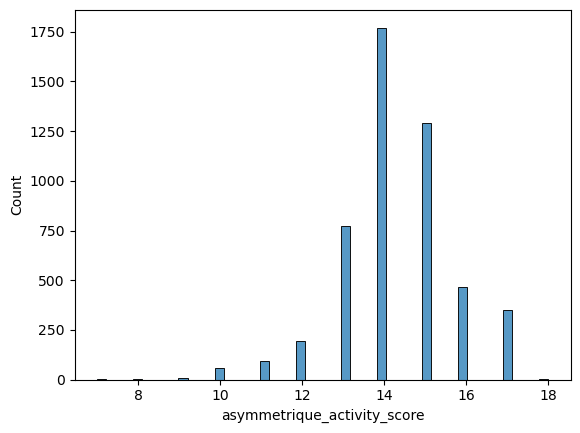

In [40]:
sns.histplot(df1.asymmetrique_activity_score[df1.asymmetrique_activity_score>0], bins=50)

<AxesSubplot:xlabel='asymmetrique_profile_score', ylabel='Count'>

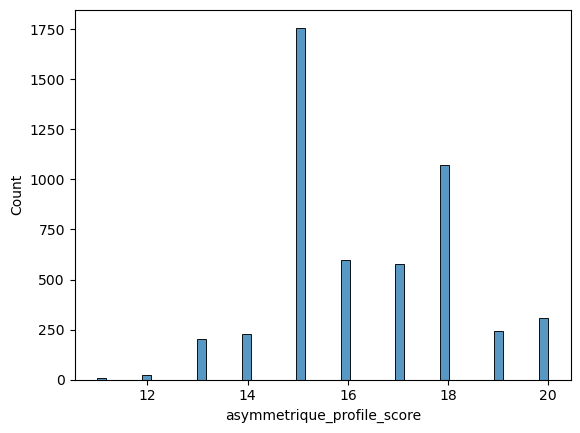

In [41]:
sns.histplot(df1.asymmetrique_profile_score [df1.asymmetrique_profile_score>0], bins=50)

In [42]:
df1.lead_profile.unique()

array(['select', 'potential_lead', 'other', 'other_leads',
       'lateral_student', 'dual_specialization_student',
       'student_of_someschool'], dtype=object)

In [43]:
from sklearn.metrics import mutual_info_score
def mutual_info_churn_score(series):
   return mutual_info_score(series,df.converted)
#mutual_info_score(df.lead_profile,df.converted)
mi = df1[numerical+categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)
mi


/home/dabah/.local/lib/python3.10/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


lead_number                                      0.666641
totalvisits                                      0.012731
total_time_spent_on_website                      0.235690
page_views_per_visit                             0.012766
asymmetrique_activity_score                      0.054284
asymmetrique_profile_score                       0.021422
prospect_id                                      0.666641
lead_origin                                      0.056251
lead_source                                      0.062893
do_not_email                                     0.010327
do_not_call                                      0.000206
last_activity                                    0.088512
country                                          0.004731
specialization                                   0.038453
how_did_you_hear_about_x_education               0.046590
what_is_your_current_occupation                  0.095197
what_matters_most_to_you_in_choosing_a_course    0.060058
search        

In [44]:
print(mi.keys())


Index(['lead_number', 'totalvisits', 'total_time_spent_on_website',
       'page_views_per_visit', 'asymmetrique_activity_score',
       'asymmetrique_profile_score', 'prospect_id', 'lead_origin',
       'lead_source', 'do_not_email', 'do_not_call', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations', 'tags',
       'lead_quality', 'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'a_free_copy_of_mastering_the_interview',
       'last_notable_activity'],
      dtype='object')


In [45]:
selection=[ 'tags','totalvisits','total_time_spent_on_website','last_notable_activity', 'city', 'converted']

In [46]:
import numpy as np

In [47]:
df=df1[selection].loc[:]
#df['total_time_spent_on_website']=np.log1p( df['total_time_spent_on_website'])
df.head()
df.isnull().sum()

tags                           0
totalvisits                    0
total_time_spent_on_website    0
last_notable_activity          0
city                           0
converted                      0
dtype: int64

In [48]:
mi = df[:].apply(mutual_info_churn_score)
mi.sort_values(ascending=True)
mi

tags                           0.377844
totalvisits                    0.012731
total_time_spent_on_website    0.235690
last_notable_activity          0.073860
city                           0.036803
converted                      0.666641
dtype: float64

In [49]:
df.nunique()

tags                             27
totalvisits                      41
total_time_spent_on_website    1731
last_notable_activity            16
city                              8
converted                         2
dtype: int64

In [50]:
df.dtypes

tags                            object
totalvisits                    float64
total_time_spent_on_website      int64
last_notable_activity           object
city                            object
converted                        int64
dtype: object

In [51]:
#df.total_time_spent_on_website[:]=pd.to_numeric(df.total_time_spent_on_website, errors='coerce')

In [52]:
#df.converted=pd.to_numeric(df.converted, errors='coerce')

Spliting the data into train/validation/test

In [53]:
from sklearn.model_selection import  train_test_split


train_full, df_test= train_test_split(df,test_size=0.2,shuffle=True)
df_train, df_validation= train_test_split(train_full,test_size=0.25,shuffle=True)
df_train_full=train_full.reset_index(drop=True)
df_train_full.reset_index(drop=True)
df_train.reset_index(drop=True)
df_validation.reset_index(drop=True)
df_test.reset_index(drop=True)

,tags,totalvisits,total_time_spent_on_website,last_notable_activity,city,converted
0,already_a_student,4.0,329,email_opened,mumbai,0
1,will_revert_after_reading_the_email,0.0,0,sms_sent,select,1
2,will_revert_after_reading_the_email,0.0,0,sms_sent,select,1
3,other,0.0,0,olark_chat_conversation,other,0
4,number_not_provided,0.0,32,modified,mumbai,0
...,...,...,...,...,...,...
1843,other,7.0,1247,email_opened,thane_&_outskirts,1
1844,other,2.0,1067,email_opened,other_cities_of_maharashtra,0
1845,ringing,2.0,1391,modified,other_cities,0
1846,interested_in_other_courses,0.0,0,modified,select,0


In [78]:
print(df_train11.loc[0].to_json())

{"tags":"interested_in_other_courses","totalvisits":0.0,"total_time_spent_on_website":0,"last_notable_activity":"modified","city":"select","converted":0}


setting up y for different splits 

In [54]:
y_train= df_train.converted.values
y_test=df_test.converted.values
y_val=df_validation.converted.values
y_train_full=df_train_full.converted.values
del df_train['converted']
del df_test['converted']
del df_validation['converted']
del  df_train_full['converted']

One hot encoding 

In [55]:
from sklearn.feature_extraction import DictVectorizer

In [56]:
train_dicts =df_train.to_dict(orient='records')
dv=DictVectorizer(sparse=False)
dv.fit(train_dicts) #show him how the data look like
x_train=dv.transform(train_dicts)

In [57]:
x_train[0]

array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0., 726.,   4.])

 Linear Regression LR 

In [58]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression(max_iter=10000)
model.fit(x_train,y_train)
pred_train=model.predict(x_train)
print((pred_train==y_train).mean())
#print(model.score(pred_train,y_train))


0.9218975468975469


In [59]:
validation_dicts =df_validation.to_dict(orient='records')
x_validation=dv.transform(validation_dicts)
pred_validation=model.predict(x_validation)

print((pred_validation==y_val).mean())
print 


0.9296536796536796


<function print>

In [60]:
print (pred_train, y_train)

[1 0 0 ... 1 0 0] [0 0 1 ... 1 0 0]


In [61]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_val, pred_validation)
print(auc)

0.9207328977998046


retrain the model with full_train 

In [62]:
x_train_full=dv.transform(df_train_full.to_dict(orient='records'))
model.fit(x_train_full,y_train_full)
pred_train_full=model.predict(x_train_full)
print((pred_train_full==y_train_full).mean())

0.9247835497835498


confusion matrix 


In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, pred_validation>=0.5)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1107   51]
 [  79  611]]


precision recall

In [64]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_val, pred_validation>0.5, average='binary')
recall = recall_score(y_val, pred_validation>00.5, average='binary')
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:",2*(precision*recall/(precision+recall)))

Precision: 0.9229607250755287
Recall: 0.8855072463768116
F1 score: 0.9038461538461539


ROC curves

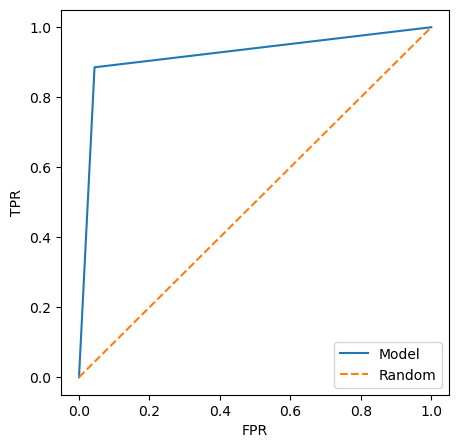

In [65]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, pred_validation)
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')
plt.xlabel('FPR') 
plt.ylabel('TPR')
plt.legend()

cross validation 

In [66]:
def train(df_train1, y_train, C=1.0):
   df_train=df_train1[selection1]
   dicts = df_train.to_dict(orient='records')
   dv1=DictVectorizer(sparse=False)
   dv1.fit(dicts) #show him how the data look like
   x_train=dv1.transform(dicts)

   model1 = LogisticRegression(C=C, max_iter=100000)
   model1.fit(x_train, y_train)
  
   return dv, model

def predict(df, dv, model):
   dicts = df[selection1].to_dict(orient='records')


   X = dv.transform(dicts)
   y_pred = model.predict_proba(X)[:, 1]


   return y_pred

In [68]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
n_splits = 5
selection1=[ 'tags','totalvisits','last_notable_activity', 'city']
for C in [0.001, 0.01, 0.1, 0.5, 1, 5, 10]:
   kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
   scores = []
   for train_idx, val_idx in kfold.split(df_train_full):
       df_train11 = train_full.iloc[train_idx]
       df_val11 = train_full.iloc[val_idx]
       y_train11 = df_train11.converted.values
       y_val11 = df_val11.converted.values
       dv11, model11 = train(df_train11, y_train11)
       y_pred11 = predict(df_val11, dv11, model11)
       auc11 = roc_auc_score(y_val11, y_pred11)
       scores.append(auc11)
   print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=0.001 0.964 +- 0.005
C=0.01 0.964 +- 0.005
C=0.1 0.964 +- 0.005
C=0.5 0.964 +- 0.005
C=1 0.964 +- 0.005
C=5 0.964 +- 0.005
C=10 0.964 +- 0.005


test partition 

In [72]:
x_test=dv.transform(df_validation.to_dict(orient='records'))
pred_test=model.predict_proba(x_test)[:, 1]
print("Accuracy test score ",(y_test==(pred_test>=0.5)).mean())
auc_test = roc_auc_score(y_test, pred_test)
print('AUC test score ',auc_test)
from sklearn.metrics import accuracy_score
accuracy_score( y_test,(pred_test >= 0.5))

Accuracy test score  0.5357142857142857
AUC test score  0.49631971200889496


0.5357142857142857

Saving the model

In [73]:
import pickle

In [74]:
output_file=f'model_1.bin'
f_out=open(output_file,'wb')
pickle.dump((dv,model),f_out)
f_out.close()